### Workflow
- Problem Definition
- Data Collection:
- Data Exploration and Cleaning:
- Feature Engineering:
- Model Evaluation and Refinement:
- Model Deployment and Monitoring:

### Problem Statement:
Many vehicle owners and fleet managers face challenges in maintaining optimal fuel efficiency while minimizing maintenance costs. Unexpected breakdowns, inefficient engine performance, and wear and tear on components can lead to increased fuel consumption and operational expenses.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fuel.csv")

C:\Users\shailesh.gaddam\AppData\Local\Temp\ipykernel_10756\2721963490.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fuel.csv")


In [3]:
df.head()

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,...,fuel_type,city_mpg_ft1,highway_mpg_ft1,combined_mpg_ft1,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_ft1,tailpipe_co2_in_grams_mile_ft1,fuel_economy_score,my_mpg_data
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,Regular,17,24,20,1750,16.480500,-1,444.350000,-1,N
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,Regular,17,24,20,1750,16.480500,-1,444.350000,-1,N
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,Regular,18,25,21,1650,15.695714,-1,423.190476,-1,N
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,Regular,18,25,21,1650,15.695714,-1,423.190476,-1,N
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,Regular,18,17,17,2050,19.388824,-1,522.764706,-1,N


In [4]:
df.shape

(38113, 24)

In [5]:
df.columns

Index(['vehicle_id', 'year', 'make', 'model', 'class', 'drive', 'transmission',
       'transmission_type', 'engine_index', 'engine_descriptor',
       'engine_cylinders', 'engine_displacement', 'turbocharger',
       'supercharger', 'fuel_type', 'city_mpg_ft1', 'highway_mpg_ft1',
       'combined_mpg_ft1', 'annual_fuel_cost_ft1',
       'annual_consumption_in_barrels_ft1', 'tailpipe_co2_ft1',
       'tailpipe_co2_in_grams_mile_ft1', 'fuel_economy_score', 'my_mpg_data'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   vehicle_id                         38113 non-null  int64  
 1   year                               38113 non-null  int64  
 2   make                               38113 non-null  object 
 3   model                              38113 non-null  object 
 4   class                              38113 non-null  object 
 5   drive                              36924 non-null  object 
 6   transmission                       38102 non-null  object 
 7   transmission_type                  15045 non-null  object 
 8   engine_index                       38113 non-null  int64  
 9   engine_descriptor                  22693 non-null  object 
 10  engine_cylinders                   37977 non-null  float64
 11  engine_displacement                37979 non-null  flo

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicle_id,38113.0,19170.638496,11134.878665,1.00,9529.00000,19058.000000,28779.000000,38542.000000
year,38113.0,2000.194527,10.464573,1984.00,1991.00000,2001.000000,2009.000000,2017.000000
engine_index,38113.0,8799.389001,17781.058490,0.00,0.00000,212.000000,4451.000000,69102.000000
engine_cylinders,37977.0,5.736656,1.752254,2.00,4.00000,6.000000,6.000000,16.000000
engine_displacement,37979.0,3.317583,1.361995,0.00,2.20000,3.000000,4.300000,8.400000
supercharger,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_mpg_ft1,38113.0,17.981109,6.849728,6.00,15.00000,17.000000,20.000000,150.000000
highway_mpg_ft1,38113.0,24.080786,7.026649,9.00,20.00000,24.000000,27.000000,122.000000
combined_mpg_ft1,38113.0,20.216068,6.772655,7.00,17.00000,19.000000,23.000000,136.000000
annual_fuel_cost_ft1,38113.0,1970.675360,532.555234,500.00,1600.00000,1950.000000,2350.000000,6050.000000


In [8]:
df.isnull().sum()

vehicle_id                               0
year                                     0
make                                     0
model                                    0
class                                    0
drive                                 1189
transmission                            11
transmission_type                    23068
engine_index                             0
engine_descriptor                    15420
engine_cylinders                       136
engine_displacement                    134
turbocharger                         32874
supercharger                         38113
fuel_type                                0
city_mpg_ft1                             0
highway_mpg_ft1                          0
combined_mpg_ft1                         0
annual_fuel_cost_ft1                     0
annual_consumption_in_barrels_ft1        0
tailpipe_co2_ft1                         0
tailpipe_co2_in_grams_mile_ft1           0
fuel_economy_score                       0
my_mpg_data

<Axes: >

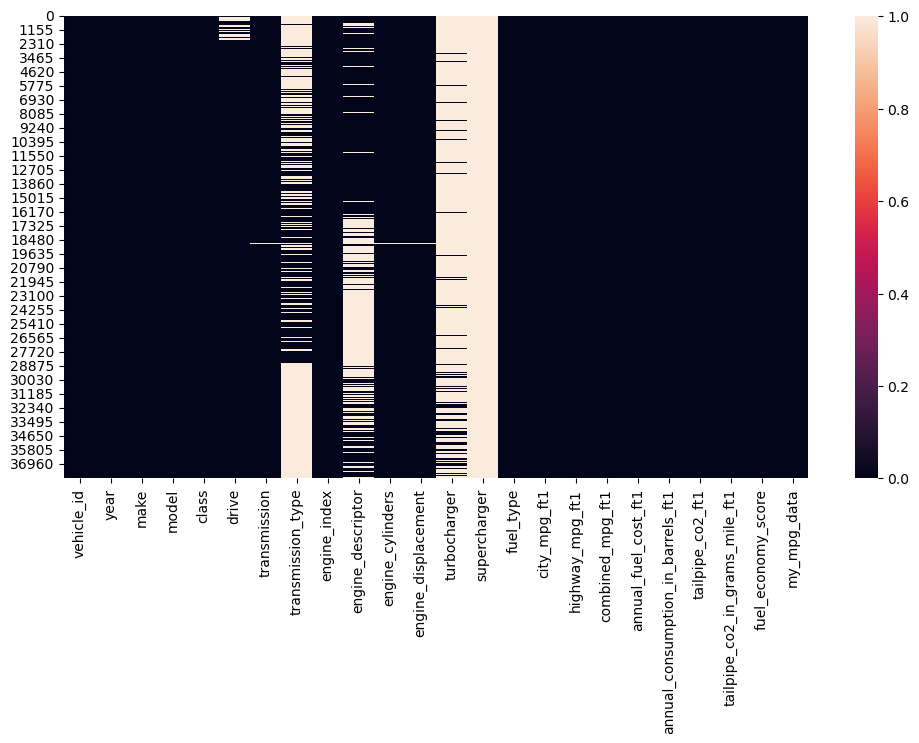

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())

In [10]:
df.duplicated().sum()

0

In [12]:
df["make"].value_counts()

make
Chevrolet                 3810
Ford                      3155
Dodge                     2531
GMC                       2398
Toyota                    1937
                          ... 
London Taxi                  1
Panoz Auto-Development       1
Lambda Control Systems       1
E. P. Dutton, Inc.           1
Excalibur Autos              1
Name: count, Length: 133, dtype: int64

In [16]:
df["make"].unique()

array(['Alfa Romeo', 'AM General', 'American Motors Corporation',
       'Aston Martin', 'Audi', 'Avanti Motor Corporation', 'Bertone',
       'Bill Dovell Motor Car Company', 'Bitter Gmbh and Co. Kg', 'BMW',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford',
       'GMC', 'Grumman Olson', 'Honda', 'Import Foreign Auto Sales Inc',
       'Isuzu', 'Jaguar', 'Jeep', 'Kenyon Corporation Of America',
       'Lamborghini', 'Lincoln', 'Lotus', 'Maserati', 'Mazda',
       'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile',
       'Peugeot', 'Pininfarina', 'Plymouth', 'Pontiac', 'Porsche',
       'Renault', 'Rolls-Royce', 'S and S Coach Company  E.p. Dutton',
       'Saab', 'Subaru', 'Superior Coaches Div E.p. Dutton', 'Suzuki',
       'Toyota', 'Volkswagen', 'Volvo', 'E. P. Dutton, Inc.', 'Ferrari',
       'Merkur', 'TVR Engineering Ltd', 'Acura', 'Autokraft Limited',
       'Hyundai', 'Lambda Control Systems', 'London Coach Co Inc',
       'Panther Car Compan

In [17]:
print(len(df["make"].unique()))

133


there are total 133 unique values present in the make feature

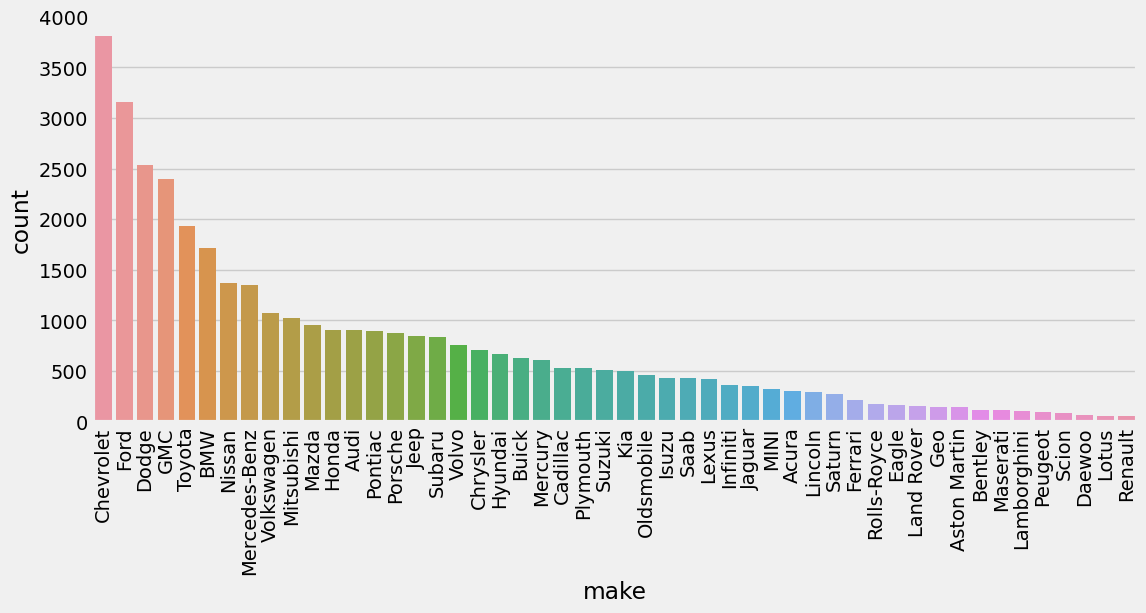

In [35]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 5))
sns.countplot(data = df , x= "make", order = df["make"].value_counts().head(50).index)
plt.xticks(rotation = 90)
plt.show()

#### observation:
- Chevrolet , Ford and Dodge are the top 3 hightest frequency in the make feature column

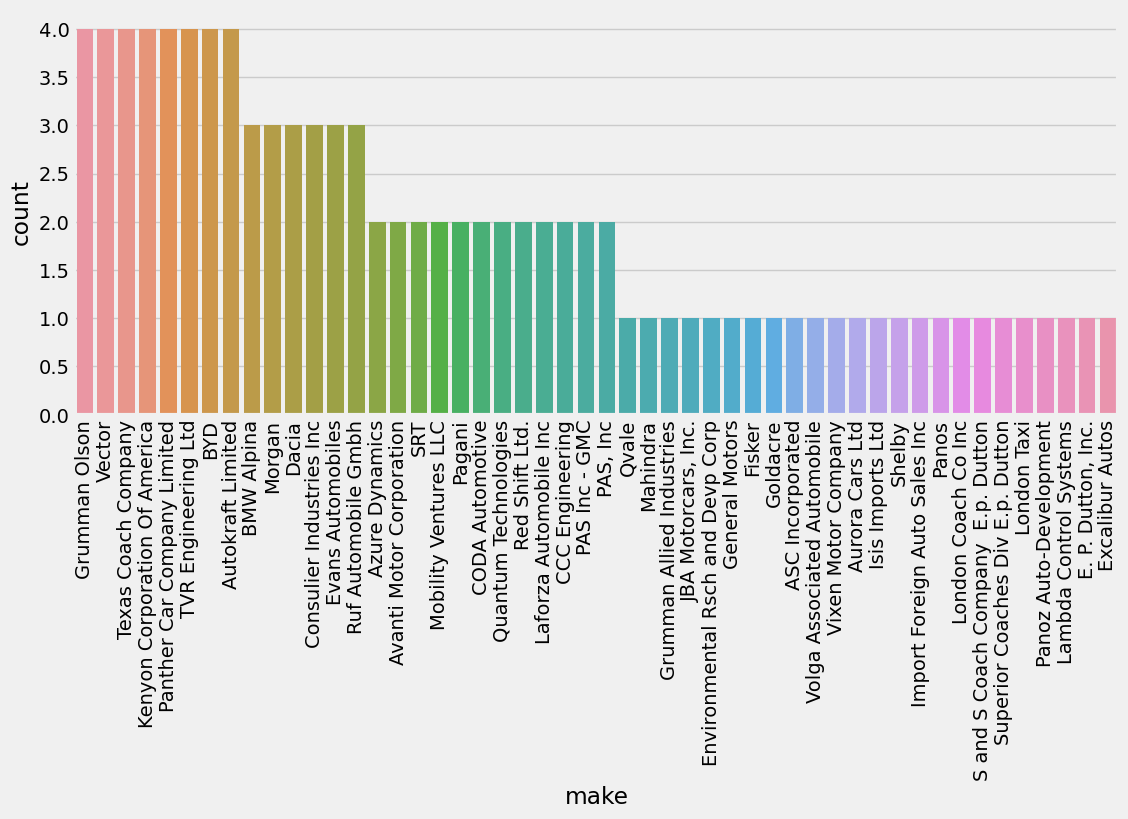

In [36]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 5))
sns.countplot(data = df , x= "make", order = df["make"].value_counts(ascending=False).tail(50).index)
plt.xticks(rotation = 90)
plt.show()

In [33]:
df["model"].unique()

array(['GT V6 2.5', 'Spider Veloce 2000', 'DJ Po Vehicle 2WD', ...,
       'S90 FWD', 'V60 Polestar AWD', 'V90 CC AWD'], dtype=object)

In [34]:
len(df["model"].unique())

3748

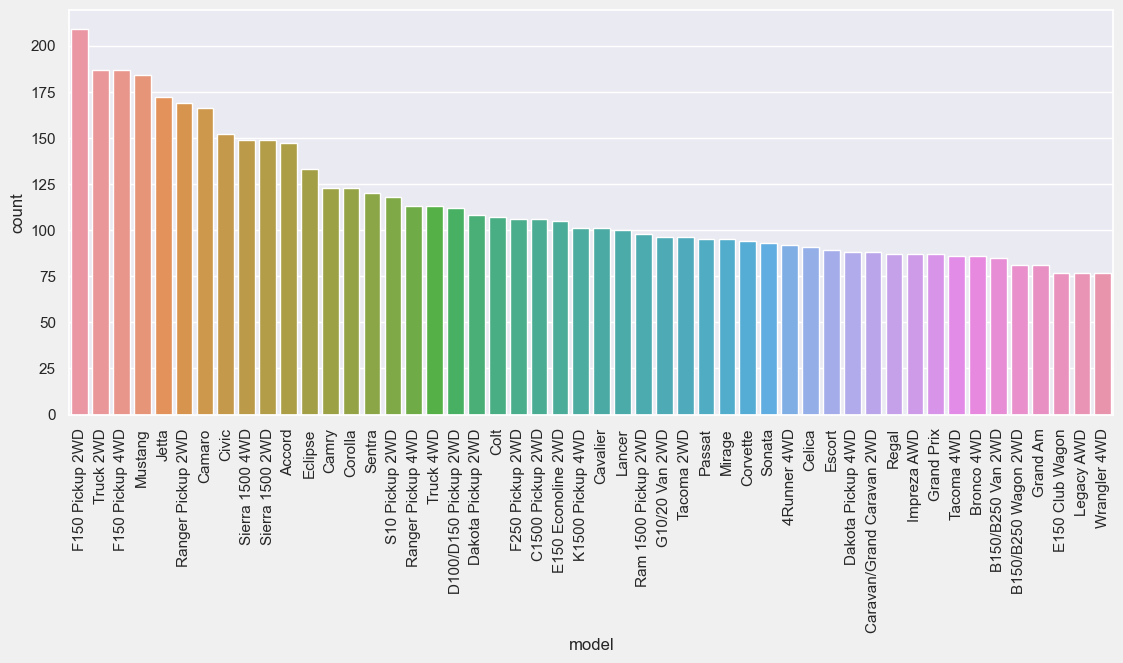

In [86]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 5))
sns.set(font_scale = 1)
sns.countplot(data = df , x= "model", order = df["model"].value_counts().head(50).index)
plt.xticks(rotation = 90)
plt.show()

In [43]:
df["class"].value_counts()

class
Compact Cars                          5508
Subcompact Cars                       4872
Midsize Cars                          4395
Standard Pickup Trucks                2354
Sport Utility Vehicle - 4WD           2082
Large Cars                            1891
Two Seaters                           1886
Sport Utility Vehicle - 2WD           1627
Small Station Wagons                  1499
Special Purpose Vehicles              1455
Minicompact Cars                      1260
Standard Pickup Trucks 2WD            1177
Vans                                  1141
Standard Pickup Trucks 4WD             986
Midsize-Large Station Wagons           656
Special Purpose Vehicle 2WD            613
Small Pickup Trucks                    538
Small Sport Utility Vehicle 4WD        526
Midsize Station Wagons                 523
Vans, Cargo Type                       438
Small Pickup Trucks 2WD                436
Standard Sport Utility Vehicle 4WD     434
Small Sport Utility Vehicle 2WD        403
Miniv

In [44]:
len(df["class"].unique())

34

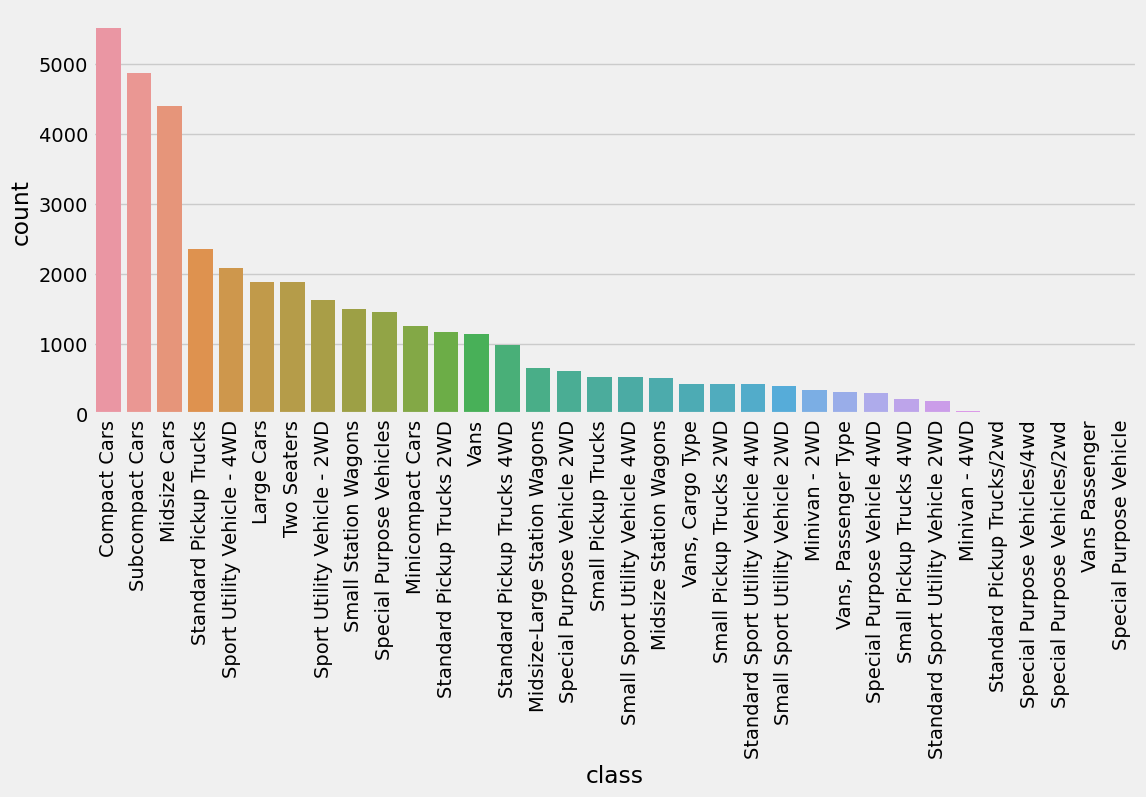

In [51]:
plt.figure(figsize=(12, 5))
sns.countplot(data = df , x= "class", order = df["class"].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

### observation:
    - Compact cars , Subcompact Cars and Midsize cars are the top 3 classes that we have found in our dataset
    - the least is Vans Passenger , Special Purpose Vehicle

In [53]:
df["drive"].value_counts()

drive
Front-Wheel Drive             13351
Rear-Wheel Drive              13018
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2121
4-Wheel Drive                  1103
2-Wheel Drive                   507
Part-time 4-Wheel Drive         176
Name: count, dtype: int64

<Axes: ylabel='count'>

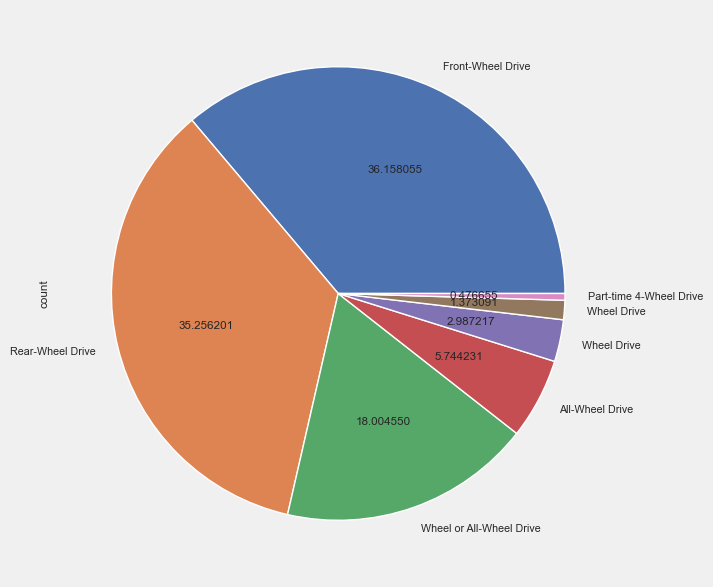

In [74]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 7))
labels = ["Front-Wheel Drive","Rear-Wheel Drive","Wheel or All-Wheel Drive ","All-Wheel Drive","Wheel Drive" , "Wheel Drive ","Part-time 4-Wheel Drive"]
explode = [0 , 0 , 0 , 0 , 0 , 0 , 0]
sns.set(font_scale=0.7)
df["drive"].value_counts().plot(kind = "pie", labels=labels, explode=explode, autopct = "%f")

In [76]:
df["transmission"].value_counts()

transmission
Automatic 4-Speed                   11042
Manual 5-Speed                       8323
Automatic 3-Speed                    3151
Automatic (S6)                       2684
Manual 6-Speed                       2448
Automatic 5-Speed                    2191
Manual 4-Speed                       1483
Automatic 6-Speed                    1447
Automatic (S8)                        977
Automatic (S5)                        827
Automatic (variable gear ratios)      702
Automatic 7-Speed                     675
Automatic (S7)                        270
Auto(AM-S7)                           266
Automatic 8-Speed                     259
Automatic (S4)                        233
Auto(AM7)                             166
Auto(AV-S6)                           153
Automatic (A1)                        124
Auto(AM6)                             120
Automatic 9-Speed                     105
Auto(AM-S6)                            87
Auto(AV-S7)                            80
Manual 3-Speed       

In [77]:
len(df["transmission"].unique())

47

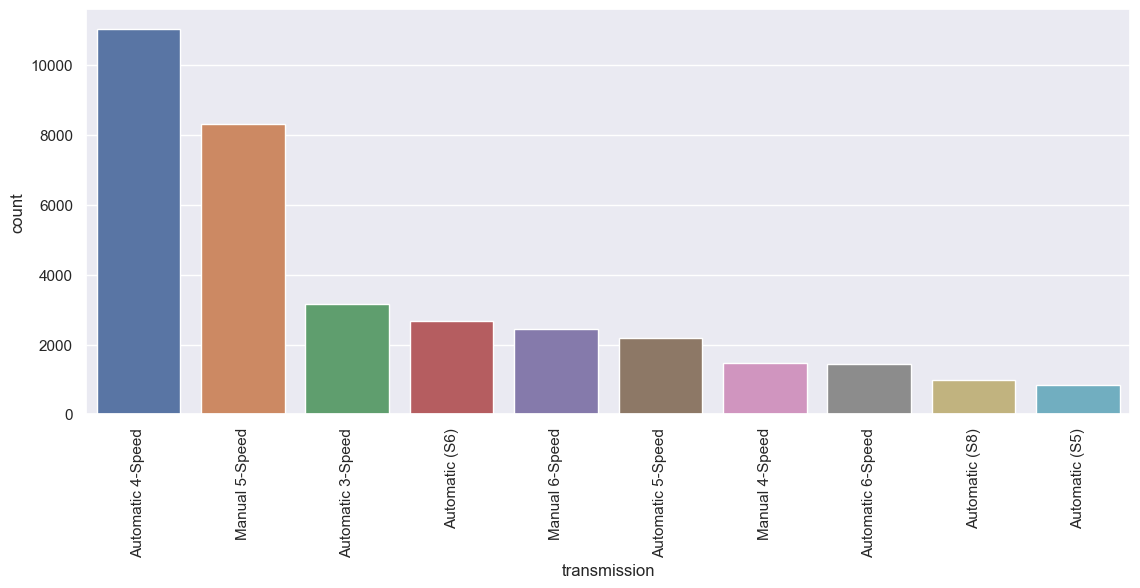

In [83]:
plt.figure(figsize=(12, 5))
sns.set(font_scale = 1)
sns.countplot(data = df , x= "transmission", order = df["transmission"].value_counts().head(10).index)
plt.xticks(rotation = 90)
plt.show()

In [87]:
df["transmission_type"].value_counts()

transmission_type
CLKUP              7809
SIL                2189
2MODE CLKUP        1235
Creeper             525
EMS 2MODE CLKUP     520
3MODE CLKUP         515
2MODE               448
2MODE 2LKUP         383
EMS                 252
3MODE               166
CMODE               150
CMODE CLKUP         130
VMODE CLKUP         105
SIL Creeper          72
2LKUP                63
DC/FW                53
VLKUP                52
EMS CLKUP            50
EMS 2MODE            46
6MODE CLKUP          41
4MODE                35
VMODE VLKUP          26
2MODE 3LKUP          22
2MODE DC/FW          19
CMODE VLKUP          17
3LKUP                15
EMS 3MODE            11
Overdrive            10
2MODE VLKUP           9
Lockup                9
SIL EMS               7
SIL 3MODE             6
6MODE                 6
4MODE CLKUP           6
SIL 2MODE CLKUP       5
EMS 2MODE CLKU        5
3MODE VLKUP           5
EMS 3MODE CLKUP       3
Mech Overdrive        3
Elec Overdrive        3
SIL CMODE             

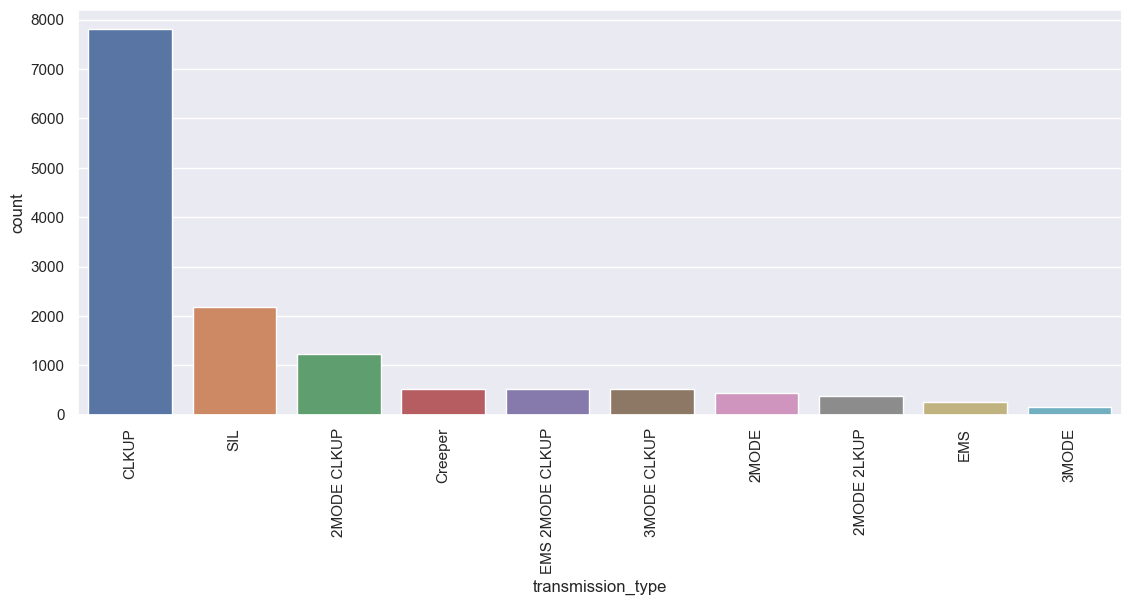

In [90]:
plt.figure(figsize=(12, 5))
sns.countplot(data = df , x= "transmission_type", order = df["transmission_type"].value_counts().head(10).index)
plt.xticks(rotation = 90)
plt.show()

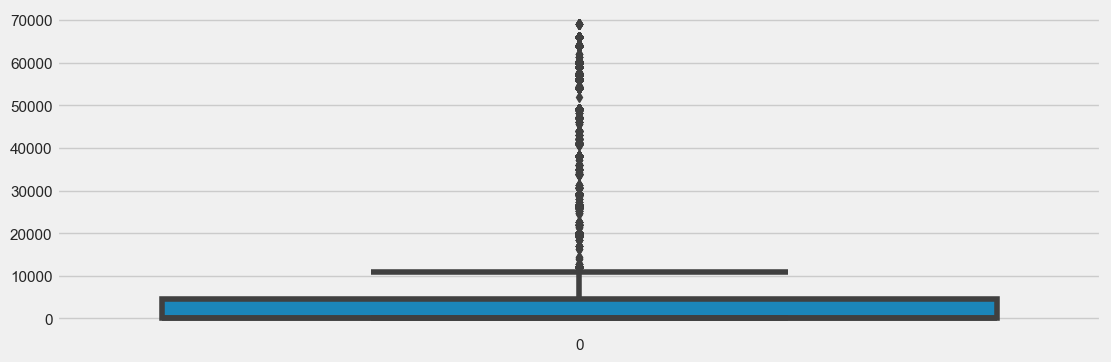

In [100]:
plt.figure(figsize=(12, 4))
plt.style.use("fivethirtyeight")
sns.boxplot(df["engine_index"])
plt.show()

In [106]:
df["engine_descriptor"].value_counts()

engine_descriptor
(FFS)                           8827
SIDI                            3674
(FFS) CA model                   926
(FFS)      (MPFI)                734
(FFS,TRBO)                       666
                                ... 
3-VALVE                            1
200                                1
B234L/R4 (FFS,TRBO)                1
16-V, CAL. (FFS)      (MPFI)       1
SIDI & PFI; Stop-Start             1
Name: count, Length: 544, dtype: int64

In [107]:
len(df["engine_descriptor"].unique())

545

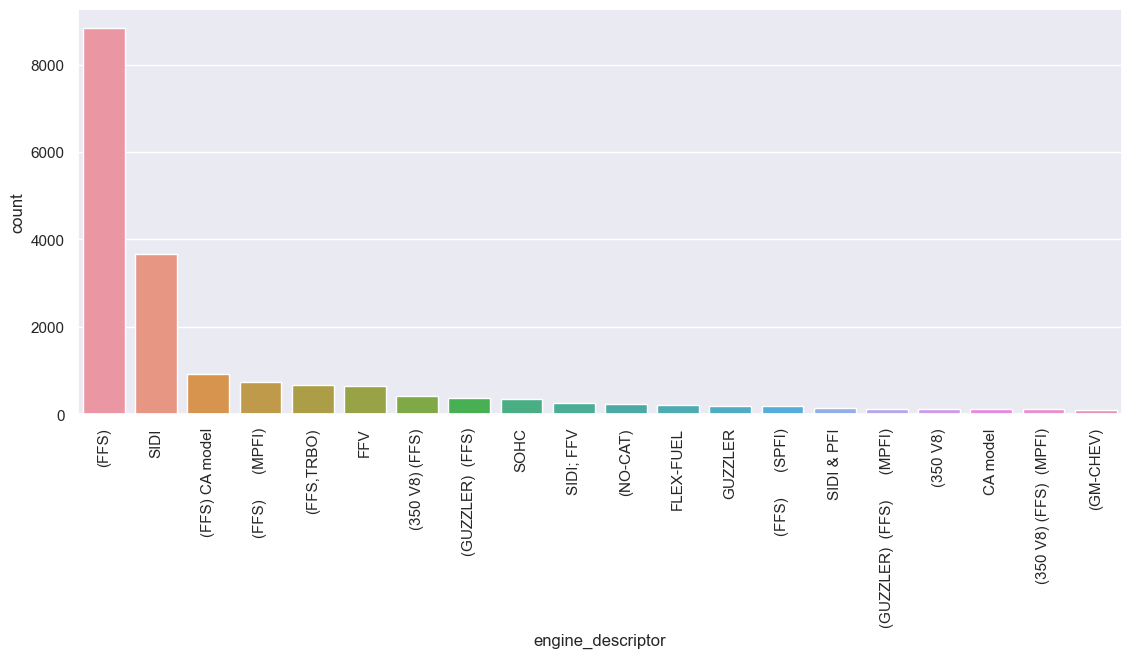

In [150]:
plt.figure(figsize=(12, 5))
sns.set(font_scale = 1)
sns.countplot(data = df , x= "engine_descriptor", order = df["engine_descriptor"].value_counts().head(20).index)
plt.xticks(rotation = 90)
plt.show()

In [115]:
df.columns

Index(['vehicle_id', 'year', 'make', 'model', 'class', 'drive', 'transmission',
       'transmission_type', 'engine_index', 'engine_descriptor',
       'engine_cylinders', 'engine_displacement', 'turbocharger',
       'supercharger', 'fuel_type', 'city_mpg_ft1', 'highway_mpg_ft1',
       'combined_mpg_ft1', 'annual_fuel_cost_ft1',
       'annual_consumption_in_barrels_ft1', 'tailpipe_co2_ft1',
       'tailpipe_co2_in_grams_mile_ft1', 'fuel_economy_score', 'my_mpg_data'],
      dtype='object')

In [117]:
df["engine_cylinders"].value_counts()

engine_cylinders
4.0     14598
6.0     13268
8.0      8342
5.0       766
12.0      574
3.0       213
10.0      153
2.0        55
16.0        8
Name: count, dtype: int64

<Axes: xlabel='engine_cylinders', ylabel='Count'>

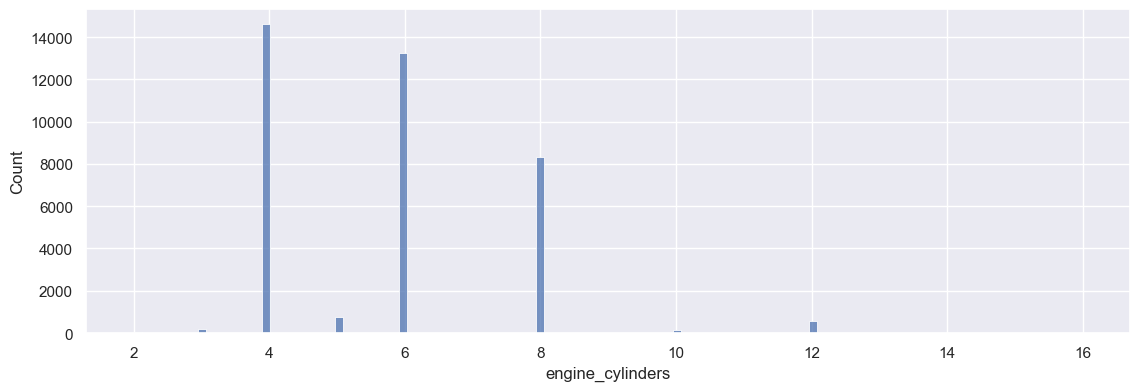

In [126]:
plt.figure(figsize=(12 , 4))
sns.histplot(df["engine_cylinders"])

C:\Users\shailesh.gaddam\AppData\Local\Temp\ipykernel_10756\3523975675.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["engine_displacement"])


<Axes: xlabel='engine_displacement', ylabel='Density'>

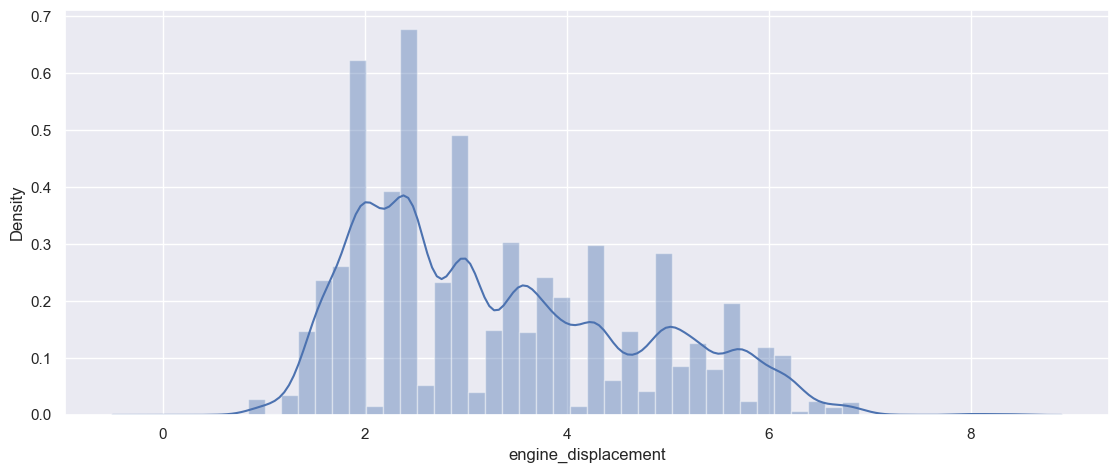

In [140]:
plt.figure(figsize=(12, 5))
sns.set(font_scale = 1)
sns.distplot(df["engine_displacement"])

In [139]:
df["engine_displacement"].value_counts()

engine_displacement
2.0    3555
3.0    2940
2.5    2388
2.4    1933
1.8    1593
       ... 
8.3       9
0.9       6
7.4       4
0.6       4
0.0       1
Name: count, Length: 66, dtype: int64

In [142]:
df["turbocharger"].value_counts()

turbocharger
True    5239
Name: count, dtype: int64

In [143]:
df["turbocharger"].unique()

array([nan, True], dtype=object)

In [147]:
df["supercharger"].value_counts()

Series([], Name: count, dtype: int64)

- supercharger have only null values so we drop this column in feature engineering

In [148]:
df["fuel_type"].unique()

array(['Regular', 'Diesel', 'Premium', 'CNG', 'Electricity',
       'Gasoline or natural gas', 'Gasoline or E85',
       'Gasoline or propane', 'Premium or E85',
       'Premium Gas or Electricity', 'Midgrade',
       'Regular Gas and Electricity', 'Premium and Electricity',
       'Regular Gas or Electricity'], dtype=object)

In [149]:
df["fuel_type"].value_counts()

fuel_type
Regular                        25258
Premium                        10133
Gasoline or E85                 1223
Diesel                          1014
Electricity                      133
Premium or E85                   122
Midgrade                          77
CNG                               60
Premium and Electricity           25
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: count, dtype: int64

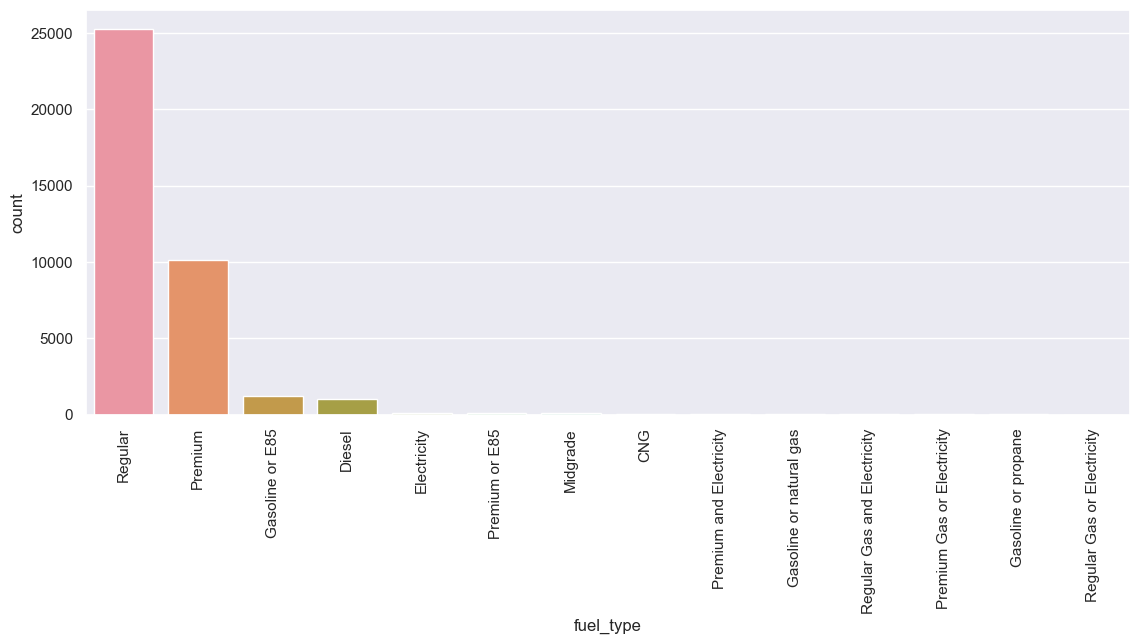

In [151]:
plt.figure(figsize=(12, 5))
sns.set(font_scale = 1)
sns.countplot(data = df , x= "fuel_type", order = df["fuel_type"].value_counts().head(20).index)
plt.xticks(rotation = 90)
plt.show()

In [152]:
df["city_mpg_ft1"].unique()

array([ 17,  18,  13,  15,  19,  16,   8,   7,  21,  14,  20,  11,  12,
        22,  23,  28,  24,  33,  10,  26,   9,  25,  31,  30,  35,  27,
        32,  38,  36,  29,  37,  34,  39,  40,  44,  42,   6,  41,  43,
        52,  49,  62,  50,  79,  59,  81,  45,  74,  48,  84,  87, 102,
        51, 107, 106,  94,  60,  77, 110, 126,  88,  53,  78,  61, 122,
       132, 129, 138,  93, 137, 128,  47,  85,  86, 120, 101,  95,  89,
        73, 121, 124,  98,  97,  92,  91,  90,  54,  58, 118,  55,  57,
       150,  46], dtype=int64)

In [153]:
df["city_mpg_ft1"].value_counts()

city_mpg_ft1
15     4332
18     3838
17     3821
16     3773
14     2865
       ... 
107       1
84        1
74        1
59        1
46        1
Name: count, Length: 93, dtype: int64

C:\Users\shailesh.gaddam\AppData\Local\Temp\ipykernel_10756\822563180.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["city_mpg_ft1"])


<Axes: xlabel='city_mpg_ft1', ylabel='Density'>

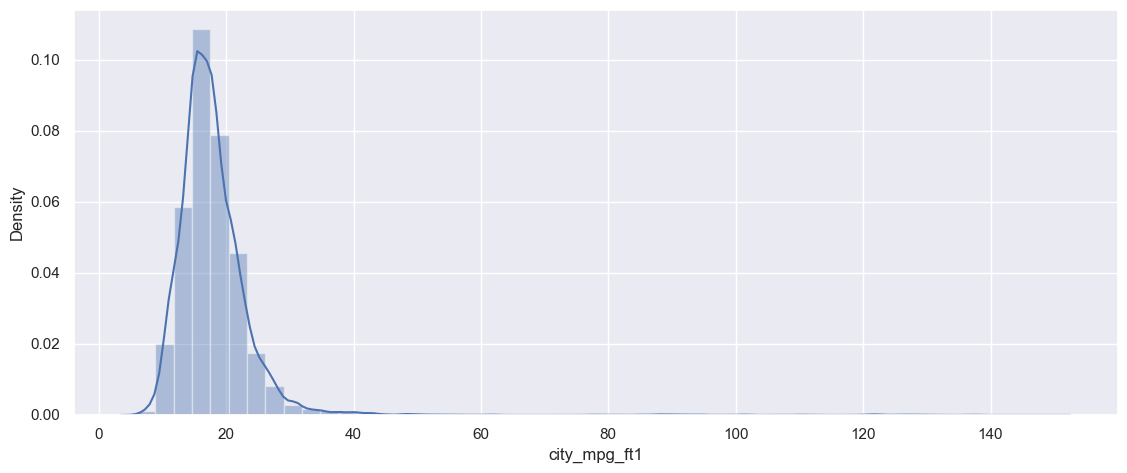

In [155]:
plt.figure(figsize=(12, 5))
sns.set(font_scale = 1)
sns.distplot(df["city_mpg_ft1"])

<Axes: >

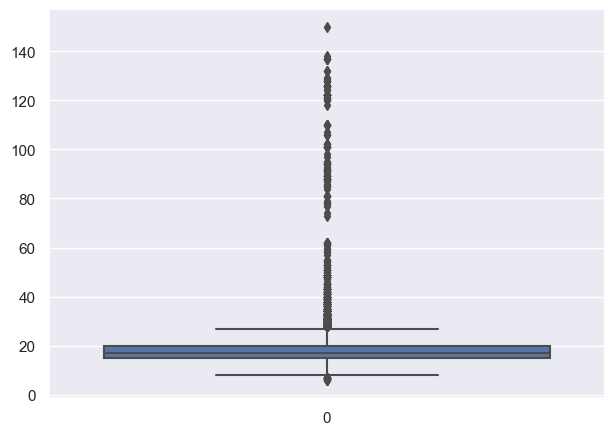

In [156]:
# lets check the outliers 
sns.boxplot(df["city_mpg_ft1"])

- in city_mpg column we have many outliers we'll handle outliers in the feature engineering part

In [158]:
df["highway_mpg_ft1"].unique()

array([ 24,  25,  17,  13,  20,  19,  22,  23,  21,  10,  11,  29,  26,
        16,  27,  28,  31,  30,  33,  32,  18,  15,  42,  41,  12,  14,
        35,  37,  34,  39,  47,  45,  38,  36,  46,  44,  40,   9,  43,
        48,  53,  51,  49,  52,  50,  58,  54,  94,  61,  91,  64,  60,
        66,  59,  69,  96,  92,  79,  62,  68,  99,  90,  74,  65, 108,
       105, 102,  93,  97, 111, 109,  83, 101,  82, 106,  98,  71, 103,
       100, 107,  95, 110, 122], dtype=int64)

In [157]:
df["highway_mpg_ft1"].value_counts()

highway_mpg_ft1
24     3185
26     3115
22     2994
23     2678
20     2523
       ... 
60        1
71        1
66        1
110       1
122       1
Name: count, Length: 83, dtype: int64

C:\Users\shailesh.gaddam\AppData\Local\Temp\ipykernel_10756\1981329928.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["highway_mpg_ft1"])


<Axes: xlabel='highway_mpg_ft1', ylabel='Density'>

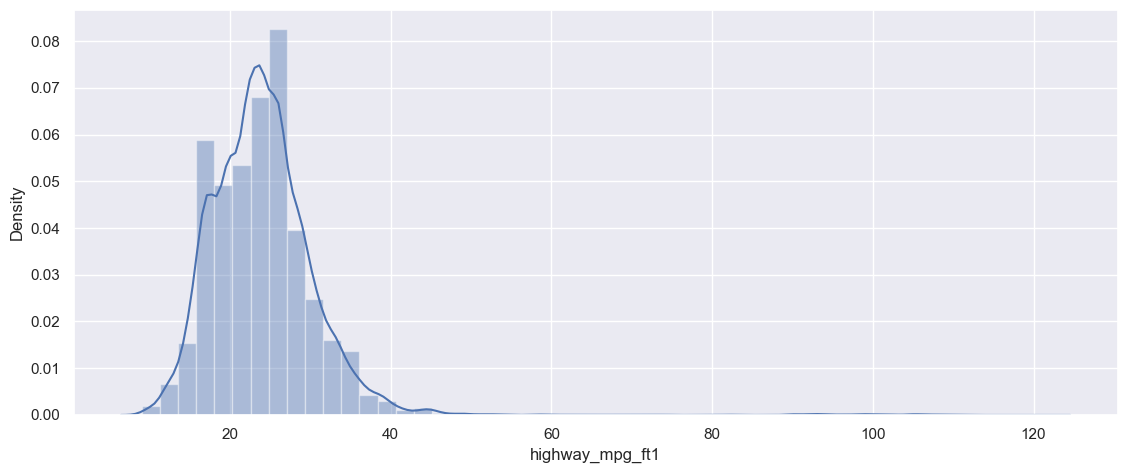

In [159]:
plt.figure(figsize=(12, 5))
sns.set(font_scale = 1)
sns.distplot(df["highway_mpg_ft1"])

<Axes: >

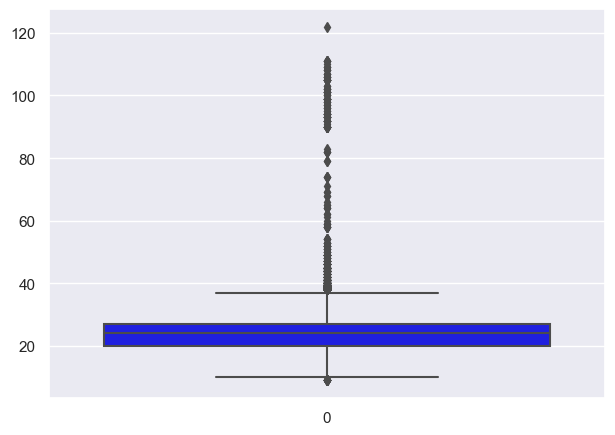

In [164]:
# lets check the outliers 
sns.boxplot(df["highway_mpg_ft1"], color="blue")

In [161]:
df["combined_mpg_ft1"].unique()

array([ 20,  21,  17,  13,  18,   9,   8,  24,  19,  16,  22,  14,  23,
        25,  15,  26,  27,  30,  36,  11,  12,  28,  29,  10,  34,  33,
        31,  32,  39,  35,  41,  40,  37,  38,  42,  43,  48,  46,   7,
        47,  44,  55,  58,  85,  56,  53,  72,  65,  75,  78,  52,  98,
        50, 102,  99,  87,  62,  73, 105, 112,  89,  76,  63, 116, 118,
       115, 121, 107,  94,  95, 124, 119,  84, 114, 101, 100,  93, 104,
       103,  92,  86, 136,  49,  54], dtype=int64)

In [162]:
df["combined_mpg_ft1"].value_counts()

combined_mpg_ft1
18     3752
19     3526
21     3388
20     3245
17     2548
       ... 
94        1
65        1
121       1
115       1
54        1
Name: count, Length: 84, dtype: int64

C:\Users\shailesh.gaddam\AppData\Local\Temp\ipykernel_10756\2749864197.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["combined_mpg_ft1"])


<Axes: xlabel='combined_mpg_ft1', ylabel='Density'>

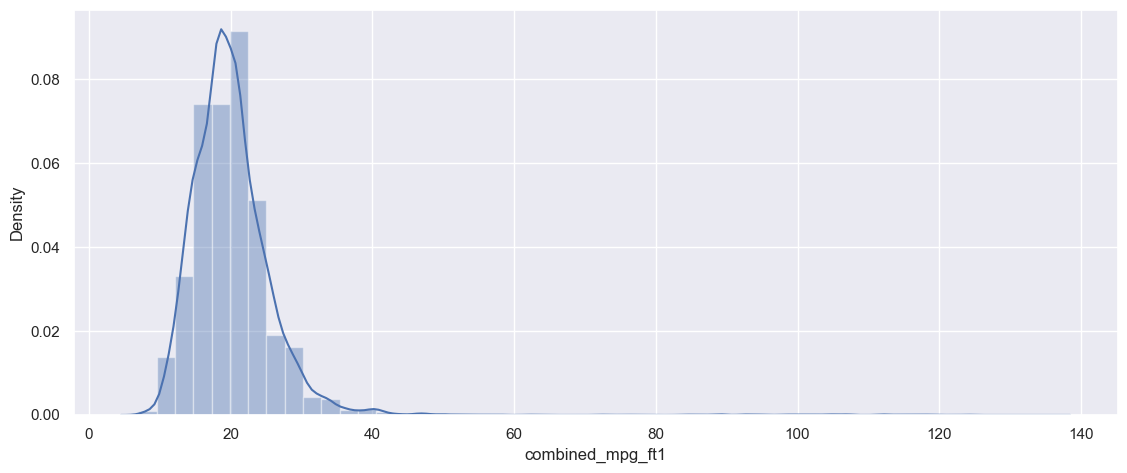

In [163]:
plt.figure(figsize=(12, 5))
sns.set(font_scale = 1)
sns.distplot(df["combined_mpg_ft1"])

In [165]:
df["annual_fuel_cost_ft1"].unique()

array([1750, 1650, 2050, 2700, 1950, 3900, 4350, 1450, 1850, 2200, 1600,
       2500, 1500, 1550, 2350, 1700, 1400, 1350, 2150, 1300, 1050, 2250,
       3200, 2900, 2400, 3500, 1150, 1200, 1100, 1000, 1250,  850,  900,
        950, 2100, 1900, 2000, 2550, 2650,  800, 3000,  750, 6050, 2800,
       3250, 4250, 3850, 5300, 1800, 2750, 4700, 2600,  650, 3100, 3450,
        700,  600,  550, 2300,  500], dtype=int64)

In [166]:
df["annual_fuel_cost_ft1"].value_counts()

annual_fuel_cost_ft1
2350    3176
1850    2543
1750    2445
1650    2416
1950    2349
2500    2084
2050    1973
2200    1693
1600    1665
1500    1665
2250    1523
1450    1411
1400    1239
2100    1168
2000    1102
2700     935
1350     908
1900     699
1300     631
2650     624
1150     596
2900     518
1250     514
2800     460
1200     434
3000     400
3250     343
3200     315
3500     314
1700     280
1050     247
1100     197
1550     181
3850     148
850      135
2400     112
2150      80
950       70
1000      66
4250      54
750       51
900       50
3900      41
600       34
4350      31
2550      30
700       29
650       25
2600      22
800       20
2300      20
550       18
4700       6
6050       5
2750       5
3450       4
5300       4
1800       3
3100       1
500        1
Name: count, dtype: int64

<Axes: xlabel='annual_fuel_cost_ft1', ylabel='Count'>

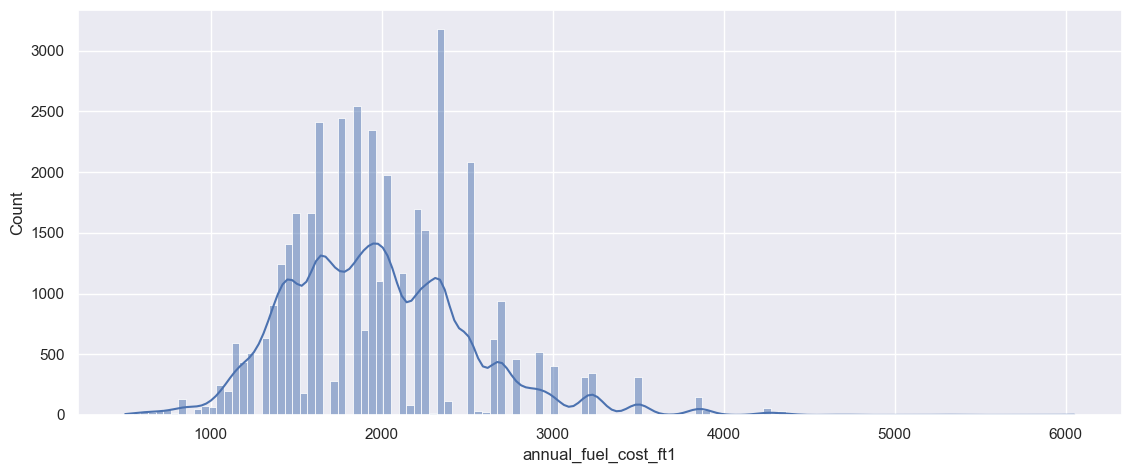

In [168]:
plt.figure(figsize=(12, 5))
sns.set(font_scale = 1)
sns.histplot(df["annual_fuel_cost_ft1"], kde=True)

In [169]:
df["annual_consumption_in_barrels_ft1"].unique()

array([16.4805    , 15.69571429, 19.38882353, 25.35461538, 18.31166667,
       36.62333333, 41.20125   , 13.73375   , 17.34789474, 20.600625  ,
       14.98227273, 23.54357143, 14.33086957, 15.2874    , 15.924375  ,
       18.19928571, 21.974     , 16.61673913, 17.37204545, 13.1844    ,
       12.67730769, 20.115     , 19.10925   , 21.2325    , 12.20777778,
       12.7395    , 10.61625   , 22.48147059, 29.96454545, 27.4675    ,
       23.8865625 , 13.64946429, 13.1787931 , 32.961     , 10.987     ,
       11.36586207,  9.69441176,  9.98818182, 10.63258065, 10.3003125 ,
        9.79961538, 11.24073529, 14.69942308, 14.155     , 12.32854839,
       11.77178571,  9.41742857,  8.03926829,  8.45153846, 10.91957143,
       11.94328125, 11.58136364,  9.32158537,  9.554625  , 10.32932432,
       10.0575    ,  9.15583333, 25.479     ,  7.84785714,  7.66534884,
        8.24025   ,  6.866875  ,  7.16543478, 47.08714286,  7.01297872,
        7.49113636,  8.90837838,  8.67394737,  0.10941176, 27.29

<Axes: xlabel='annual_consumption_in_barrels_ft1', ylabel='Count'>

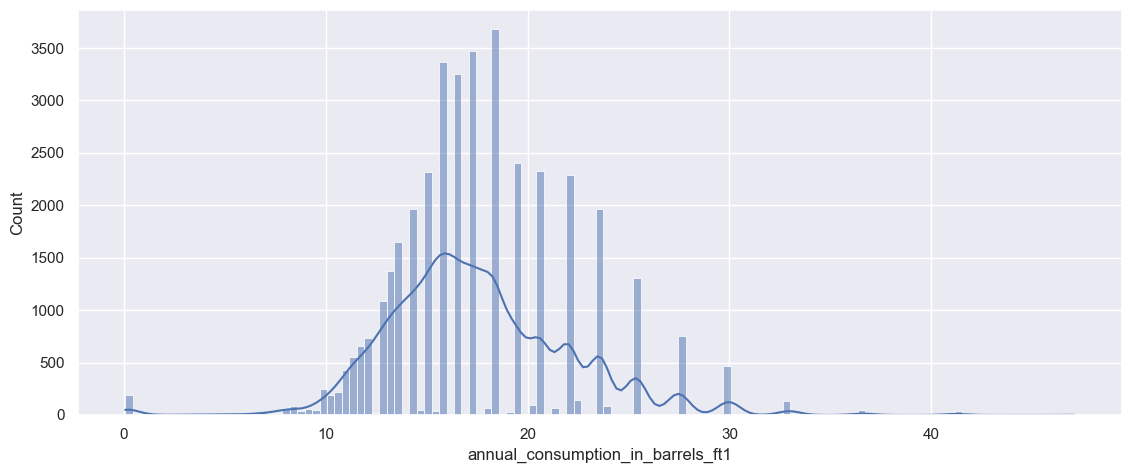

In [170]:
plt.figure(figsize=(12, 5))
sns.set(font_scale = 1)
sns.histplot(df["annual_consumption_in_barrels_ft1"], kde=True)

<Axes: xlabel='tailpipe_co2_ft1', ylabel='Count'>

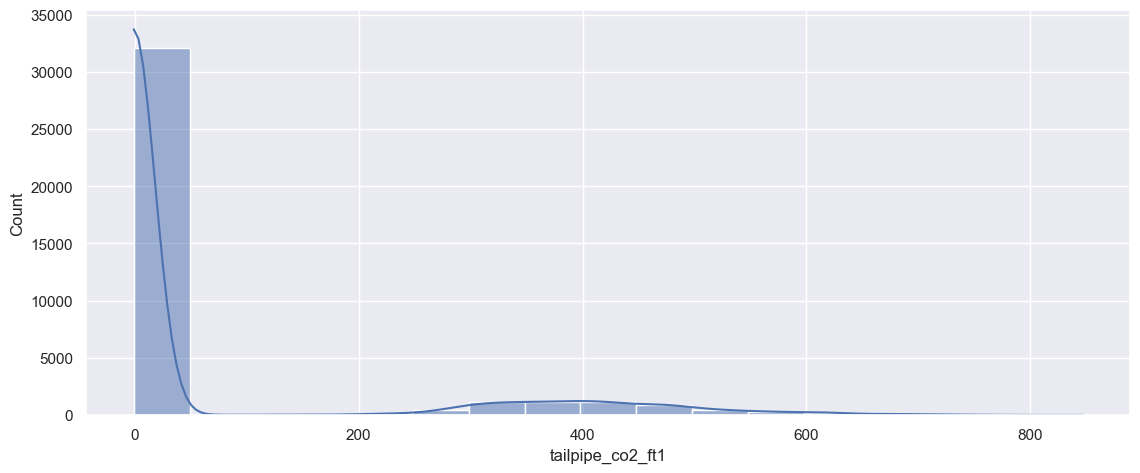

In [177]:
plt.figure(figsize=(12, 5))
sns.set(font_scale = 1)
sns.histplot(df["tailpipe_co2_ft1"], kde =True)

C:\Users\shailesh.gaddam\AppData\Local\Temp\ipykernel_10756\1445312263.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["tailpipe_co2_in_grams_mile_ft1"])


<Axes: xlabel='tailpipe_co2_in_grams_mile_ft1', ylabel='Density'>

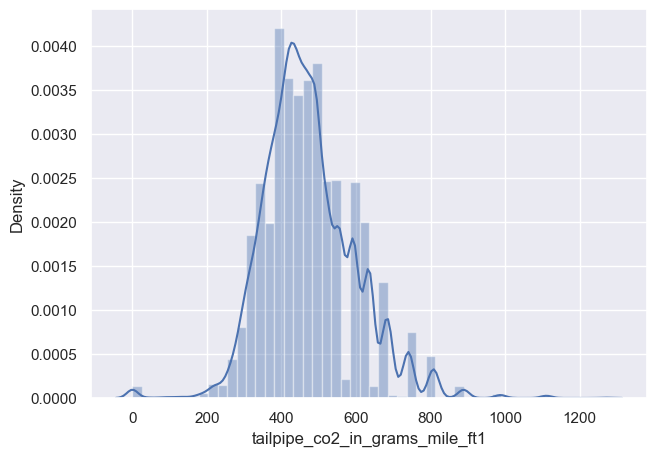

In [180]:
sns.distplot(df["tailpipe_co2_in_grams_mile_ft1"])

In [181]:
df["fuel_economy_score"].unique()

array([-1,  7,  6,  9,  4,  5,  3,  2,  1,  8, 10], dtype=int64)

In [182]:
df["fuel_economy_score"].value_counts()

fuel_economy_score
-1     31993
 5      1555
 4      1139
 6       958
 7       809
 3       514
 8       458
 2       294
 10      168
 1       130
 9        95
Name: count, dtype: int64

C:\Users\shailesh.gaddam\AppData\Local\Temp\ipykernel_10756\1482814819.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["fuel_economy_score"])


<Axes: xlabel='fuel_economy_score', ylabel='Density'>

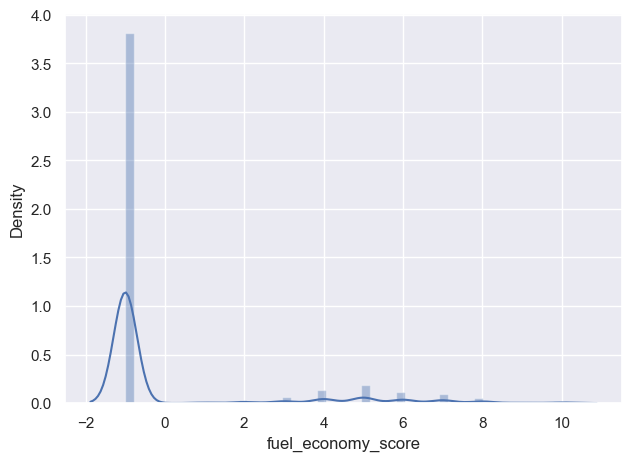

In [183]:
sns.distplot(df["fuel_economy_score"])

In [185]:
df["my_mpg_data"].value_counts()

my_mpg_data
N    25552
Y    12561
Name: count, dtype: int64

<Axes: xlabel='my_mpg_data', ylabel='count'>

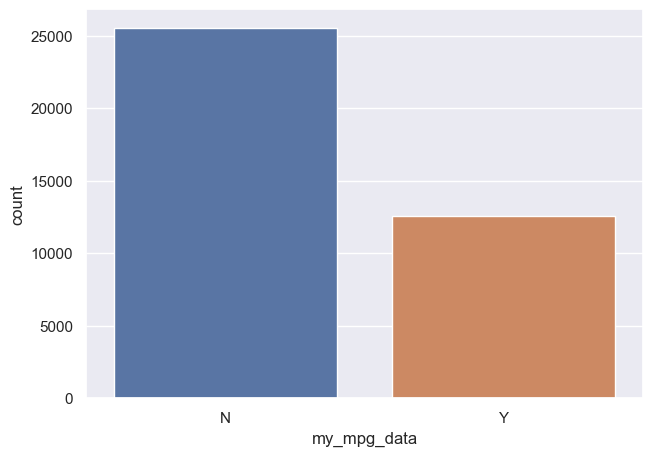

In [189]:
sns.countplot(x = "my_mpg_data", data=df)

In [190]:
df.columns

Index(['vehicle_id', 'year', 'make', 'model', 'class', 'drive', 'transmission',
       'transmission_type', 'engine_index', 'engine_descriptor',
       'engine_cylinders', 'engine_displacement', 'turbocharger',
       'supercharger', 'fuel_type', 'city_mpg_ft1', 'highway_mpg_ft1',
       'combined_mpg_ft1', 'annual_fuel_cost_ft1',
       'annual_consumption_in_barrels_ft1', 'tailpipe_co2_ft1',
       'tailpipe_co2_in_grams_mile_ft1', 'fuel_economy_score', 'my_mpg_data'],
      dtype='object')